# <FONT COLOR="Red">Partie 1 : Statistiques descriptives</font> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### Récupération des données

In [2]:
data_pepsi = pd.read_csv("../databases/PEPSIR_raw_LF_perfect.csv", sep=";")
print('Pepsi -> Missing Data : ',data_pepsi.isna().sum().sum(), '  Shape is : ', data_pepsi.shape)
display(data_pepsi.head())



data_hydro = pd.read_csv("../databases/HYDROSWOT_100m_V3.csv", sep=";")
print('Hydro -> Missing Data : ',data_hydro.isna().sum().sum(), '  Shape is : ', data_hydro.shape)
display(data_hydro.head())
data_hydro.dropna(inplace=True)


Pepsi -> Missing Data :  0   Shape is :  (55525, 21)


,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
0,Connecticut,1,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,26.306667,475.403333,...,0.001768,541.200050,12.808404,515.403333,821.447783,10.945707,0.225114,0.217360,0.965178,922.263333
1,Connecticut,2,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.960000,443.906667,...,0.001606,381.870528,12.586607,515.403333,821.447783,10.945707,0.225114,0.165027,0.704906,581.980000
2,Connecticut,3,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.810000,427.006667,...,0.001539,316.600322,12.513133,515.403333,821.447783,10.945707,0.225114,0.141175,0.595232,460.586667
3,Connecticut,4,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.776667,423.786667,...,0.001521,302.424628,12.499948,515.403333,821.447783,10.945707,0.225114,0.135371,0.569428,435.253333
4,Connecticut,5,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.616667,406.016667,...,0.001469,236.099400,12.410309,515.403333,821.447783,10.945707,0.225114,0.113845,0.471288,334.273333


Hydro -> Missing Data :  34   Shape is :  (16637, 41)


,site_no,station_name,river,stream_type,lon,lat,flowacc,stage,W,dH,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
0,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.527048,125.8824,0.999744,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,76.172317
1,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,8.909304,152.0952,8.382000,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,1486.634446
2,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.271016,116.4336,0.743712,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,46.156460
3,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.752344,112.1664,2.225040,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,150.645624
4,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.173224,120.3960,1.645920,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,140.168391


**Suppression de certaines données**

In [3]:
data_hydro.drop(['LC1','LC2','LC3','LC4','LC5','LC6','LC7','LC8','LC9','LC10','LC11','LC12',
                 'Q5_GSCD','Q10_GSCD','Q20_GSCD','QMEAN_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD'],axis=1,inplace=True)

data_hydro.head()

,site_no,station_name,river,stream_type,lon,lat,flowacc,stage,W,dH,...,A0,Abar,Amed,Sdem,clay,sand,silt,PA,TA,Q
0,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.527048,125.8824,0.999744,...,100.144012,256.363762,190.883041,0.000983,18.801653,47.338843,33.834711,1391.111111,18.077047,76.172317
1,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,8.909304,152.0952,8.382000,...,100.144012,256.363762,190.883041,0.000983,18.801653,47.338843,33.834711,1391.111111,18.077047,1486.634446
2,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.271016,116.4336,0.743712,...,100.144012,256.363762,190.883041,0.000983,18.801653,47.338843,33.834711,1391.111111,18.077047,46.156460
3,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.752344,112.1664,2.225040,...,100.144012,256.363762,190.883041,0.000983,18.801653,47.338843,33.834711,1391.111111,18.077047,150.645624
4,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.173224,120.3960,1.645920,...,100.144012,256.363762,190.883041,0.000983,18.801653,47.338843,33.834711,1391.111111,18.077047,140.168391


**On supprime les débits inférieurs à 100 $m^3/s$**

In [4]:
data_pepsi = data_pepsi.loc[data_pepsi['Q']>100]
data_hydro = data_hydro.loc[data_hydro['Q']>100]

In [5]:
print("Variables pepsi : " , data_pepsi.columns)
print("Variables hydro : " , data_hydro.columns)

Variables pepsi :  Index(['river', 'day', 'reach', 'lon', 'lat', 'flowacc', 'sinuosity',
       'meandwave', 'height', 'W', 'A', 'S', 'dA', 'K', 'A0', 'Abar', 'alpha',
       'beta', 'Fr', 'U', 'Q'],
      dtype='object')
Variables hydro :  Index(['site_no', 'station_name', 'river', 'stream_type', 'lon', 'lat',
       'flowacc', 'stage', 'W', 'dH', 'dA', 'U', 'A0', 'Abar', 'Amed', 'Sdem',
       'clay', 'sand', 'silt', 'PA', 'TA', 'Q'],
      dtype='object')


In [6]:
river_means_pepsi=data_pepsi.groupby("river", as_index=False).mean()
river_means_hydro=data_hydro.groupby("river", as_index=False).mean()

In [7]:
display("Pepsi", river_means_pepsi.describe())
display("Hydro", river_means_hydro.describe())

'Pepsi'

,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
count,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,145.745748,4.550796,-52.451062,39.075888,4.034065e+05,1.109080,4121.047504,98.893415,923.261143,4367.742894,0.000220,1639.618431,38.757111,2734.935643,4343.183107,45.302681,-0.058182,0.119861,0.750400,3996.163655
std,64.780728,2.289309,63.248068,6.062336,6.112239e+05,0.237712,7275.361681,82.978841,1803.388558,6988.261356,0.000536,3364.849302,13.266023,3954.577779,6928.955624,21.126430,0.234879,0.062474,0.287422,7052.717460
min,76.098807,1.998382,-121.994858,23.606131,8.484700e+03,1.001894,933.535217,3.333505,106.725623,214.244322,0.000008,55.278036,14.112584,91.393339,182.651849,12.587895,-0.574863,0.040108,0.273451,198.389412
25%,110.500000,2.959405,-89.424400,38.371399,2.855860e+04,1.001894,1096.933960,15.512602,225.778028,863.756084,0.000020,171.941158,32.904442,477.927053,856.679512,29.874705,-0.194647,0.072838,0.569810,503.491760
50%,110.500000,4.000000,-85.278900,38.738621,2.341812e+05,1.039897,2476.190674,95.227569,375.240450,1442.688253,0.000044,480.744766,37.755101,940.614231,1431.633018,42.864379,-0.018848,0.091728,0.724872,1033.050154
75%,183.000000,5.444444,1.439300,41.630207,2.341812e+05,1.112189,4400.909180,148.751418,654.147334,4957.478551,0.000194,862.883767,44.937547,4099.595052,4957.478551,56.790784,0.059561,0.174503,0.890953,3830.904487
max,298.000000,11.250000,91.975410,48.638222,2.361844e+06,2.244732,39357.117188,275.265129,9013.110585,35123.972858,0.002824,15093.801193,76.649548,19967.199390,34710.470485,98.593766,0.642209,0.239151,1.339772,31534.985385


'Hydro'

,site_no,lon,lat,flowacc,stage,W,dH,dA,U,A0,Abar,Amed,Sdem,clay,sand,silt,PA,TA,Q
count,1.530000e+02,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2.036891e+11,-90.266297,38.921457,5.983079e+04,8.714112,200.554657,3.056883,516.152895,0.797510,319.635848,734.584984,601.687134,0.000708,19.234630,37.933607,42.829453,1021.290308,12.248013,651.151533
std,2.519422e+12,11.982608,5.228082,1.659998e+05,19.249277,119.975300,7.780246,1394.085212,0.297125,604.201722,1029.467921,973.099798,0.001103,4.914410,11.788274,10.108806,278.132866,4.579558,1014.365708
min,1.012469e+06,-122.989000,28.360000,3.392884e+02,0.231648,59.020558,0.156972,17.763061,0.132207,4.485503,54.439180,24.194892,0.000000,7.181818,15.264463,13.165289,197.178261,2.794338,102.554840
25%,2.421838e+06,-95.230000,35.220000,6.340291e+03,2.626346,129.586736,1.178871,181.624066,0.598122,62.782133,279.235414,198.063565,0.000177,16.194915,28.433773,37.338843,877.111111,8.797294,300.855423
50%,5.420460e+06,-90.260302,38.862007,1.575821e+04,4.129939,159.897235,1.916373,267.889632,0.750875,128.473011,430.028823,336.450849,0.000402,19.010427,36.045045,43.324324,1055.222222,12.230319,414.091156
75%,7.249413e+06,-81.567192,42.160000,3.499355e+04,6.149340,231.321864,3.026898,428.623040,0.964586,292.207499,768.058762,610.703908,0.000827,22.157025,46.744524,49.871039,1180.444444,15.994292,636.758098
max,3.116353e+13,-68.150000,48.953373,1.584953e+06,125.608341,793.351469,91.670124,13637.773873,1.763776,4190.959360,7848.822759,7217.227648,0.008614,34.314765,79.702479,62.390592,1634.444444,21.732312,7888.527805


**Nombre d'observations par rivières et par site**

### Boxplots

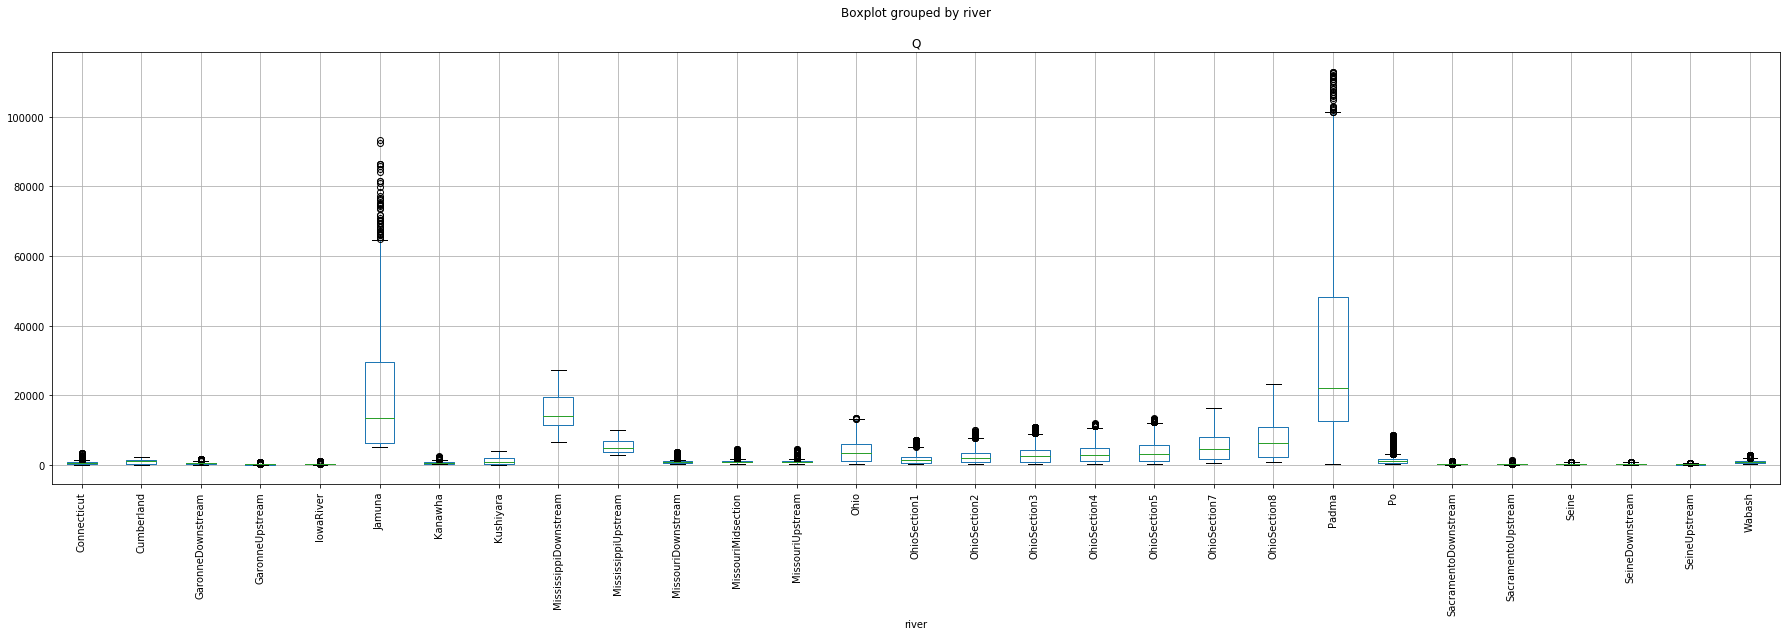

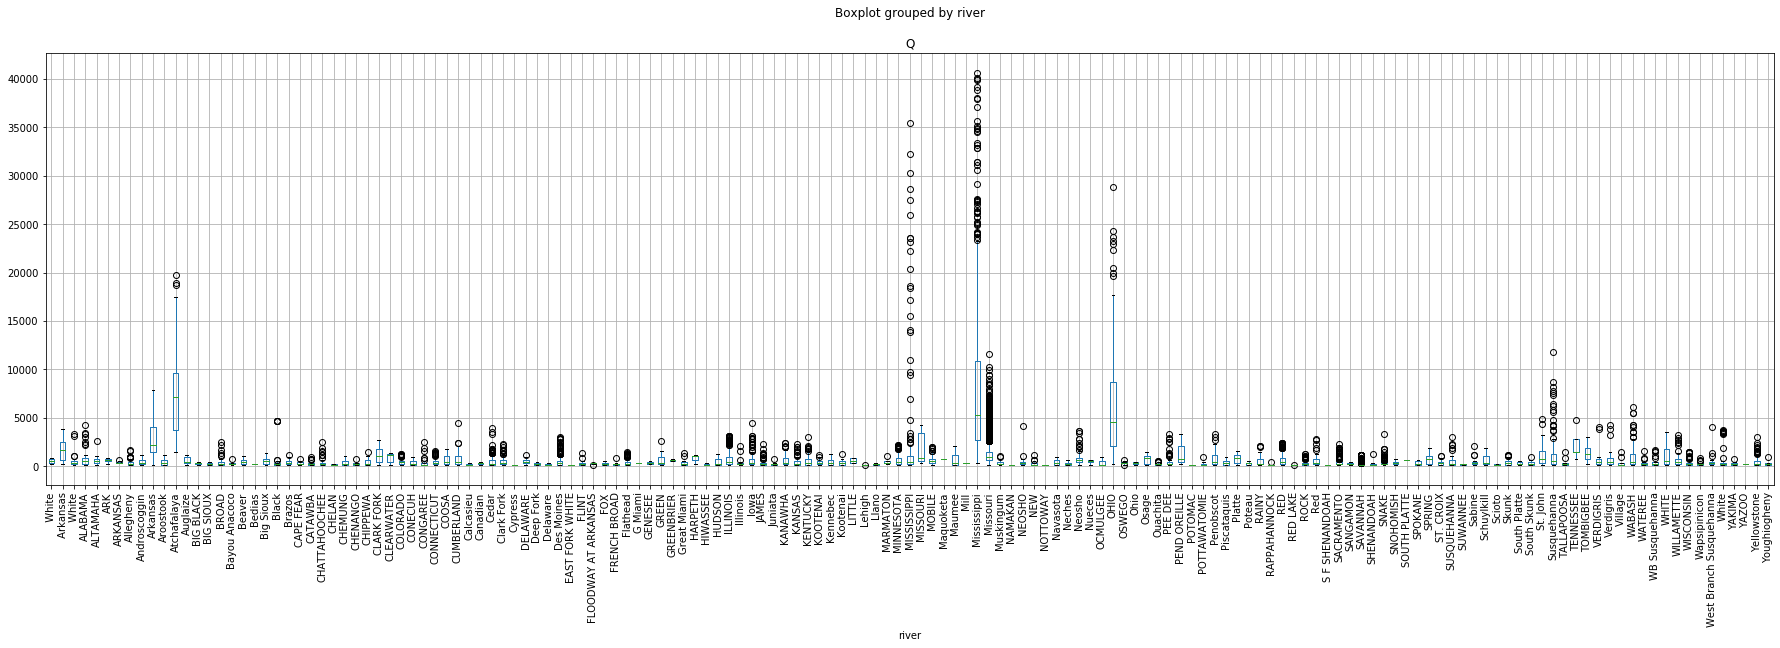

In [8]:
data_pepsi.boxplot("Q", "river", figsize=(30,8), rot=90);
data_hydro.boxplot("Q", "river", figsize=(30,8), rot=90);

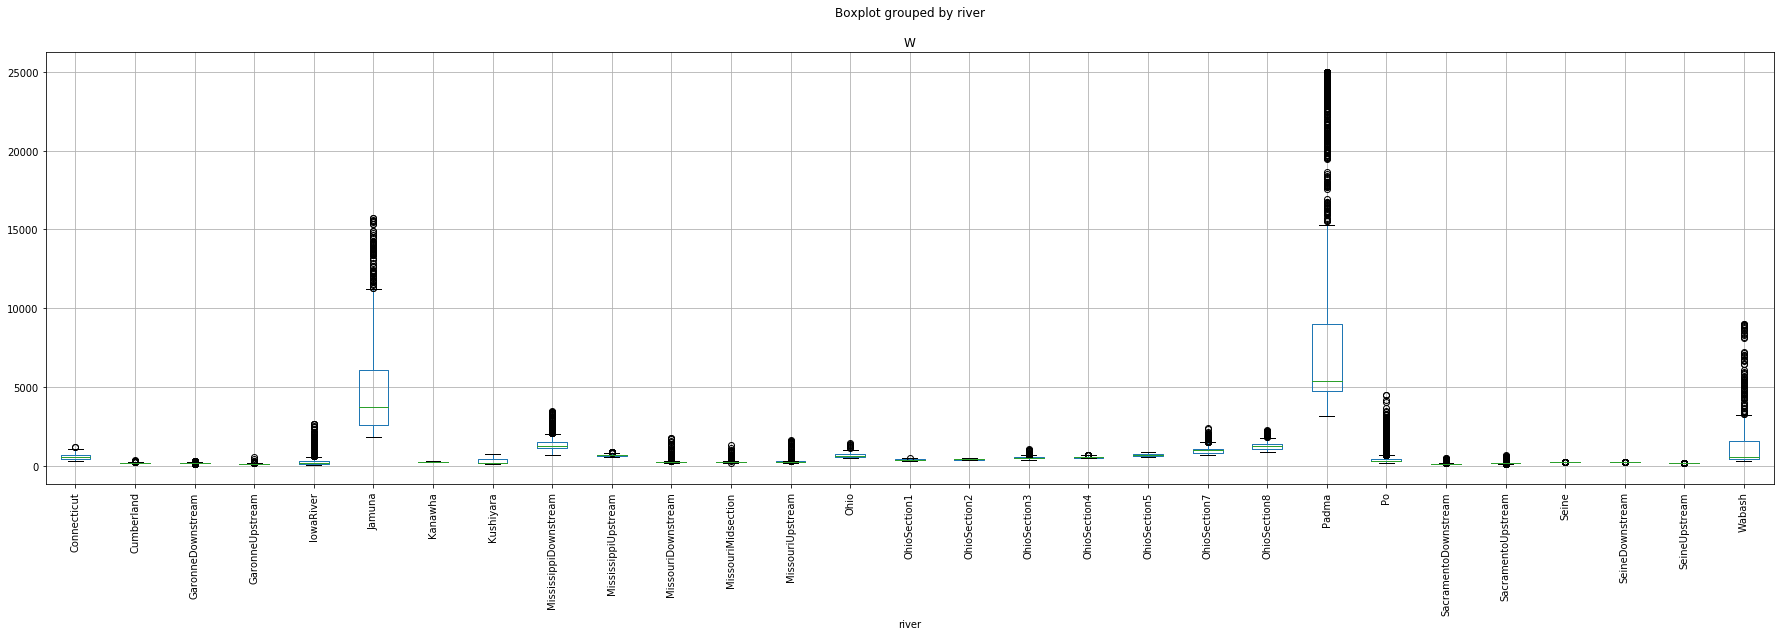

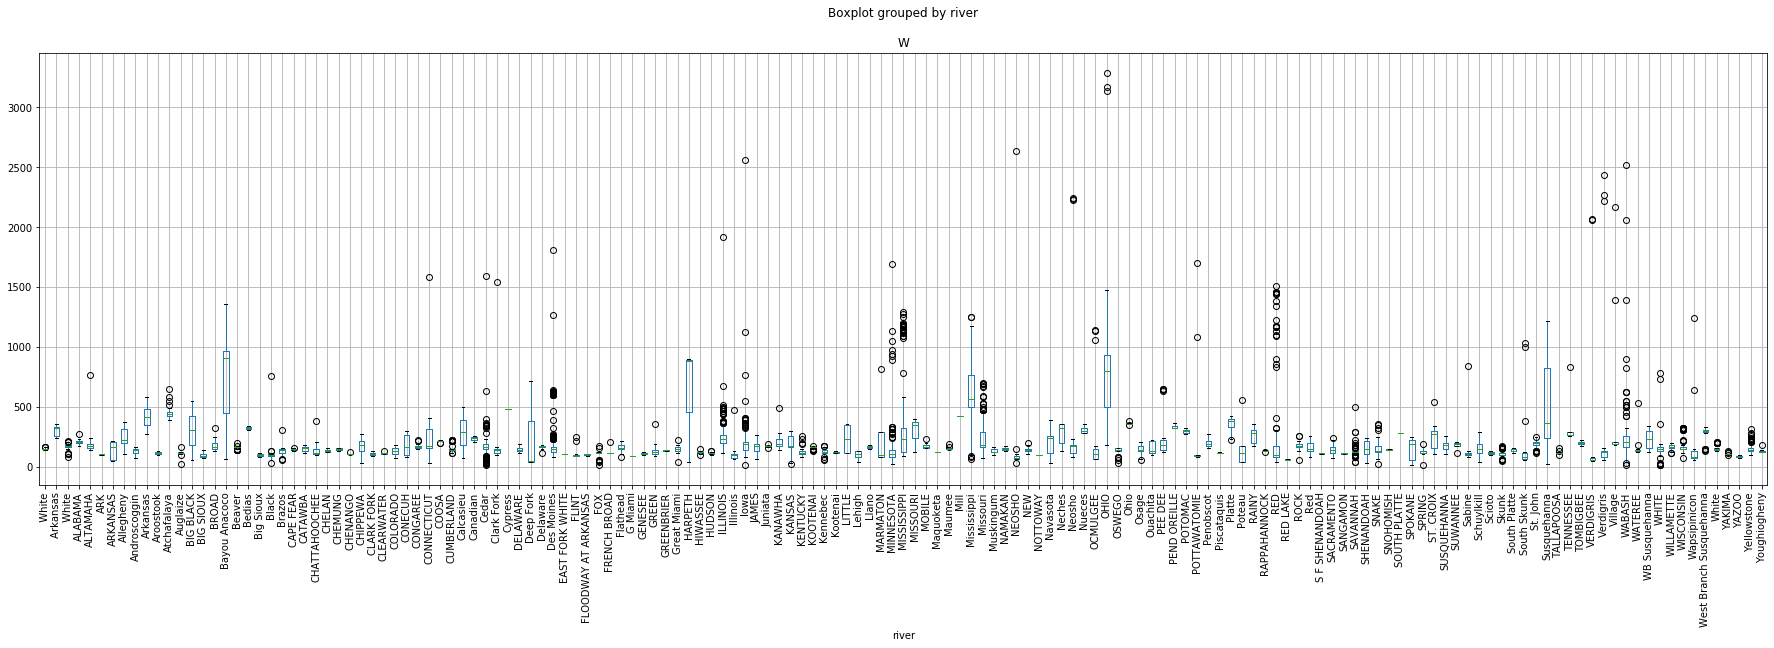

In [9]:
data_pepsi.boxplot("W", "river", figsize=(30,8), rot=90);
data_hydro.boxplot("W", "river", figsize=(30,8), rot=90);

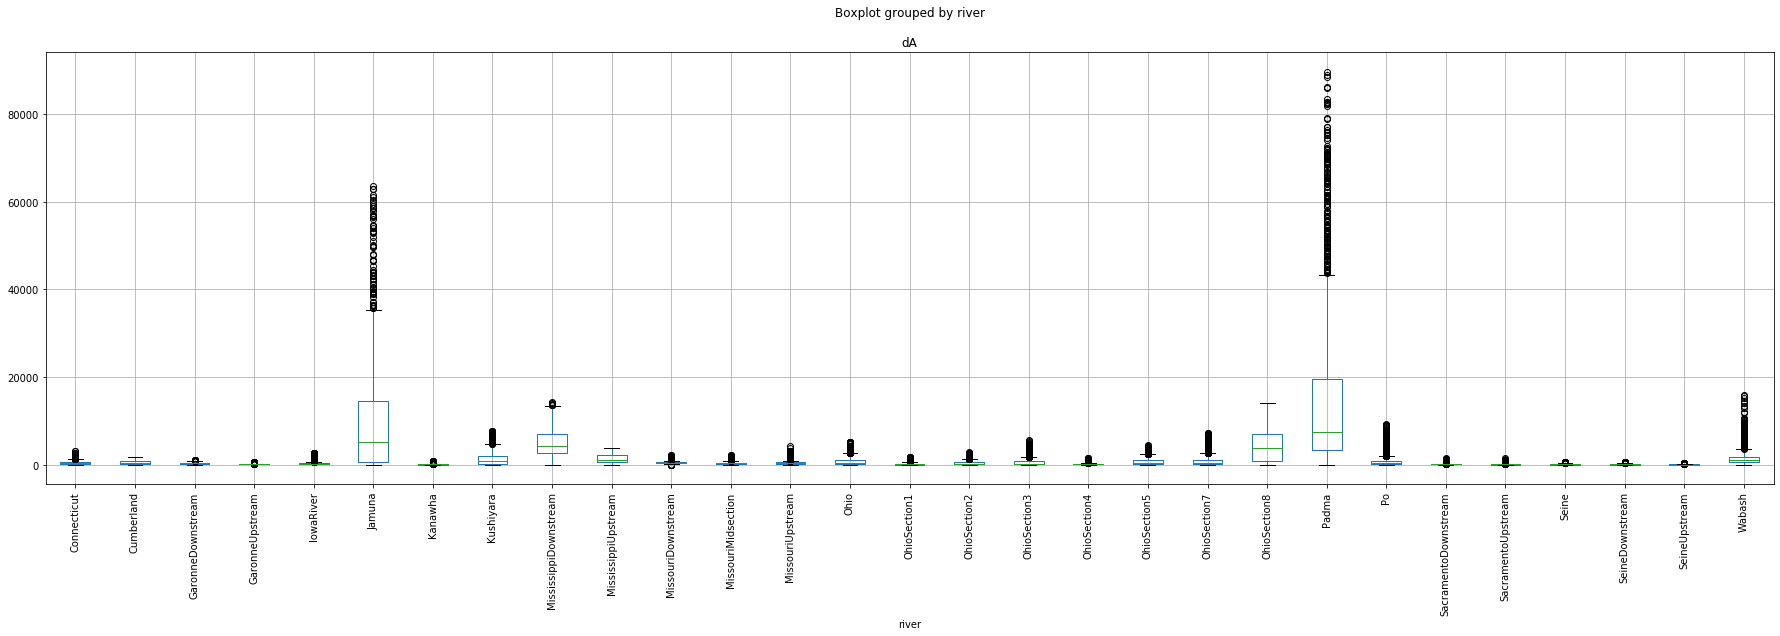

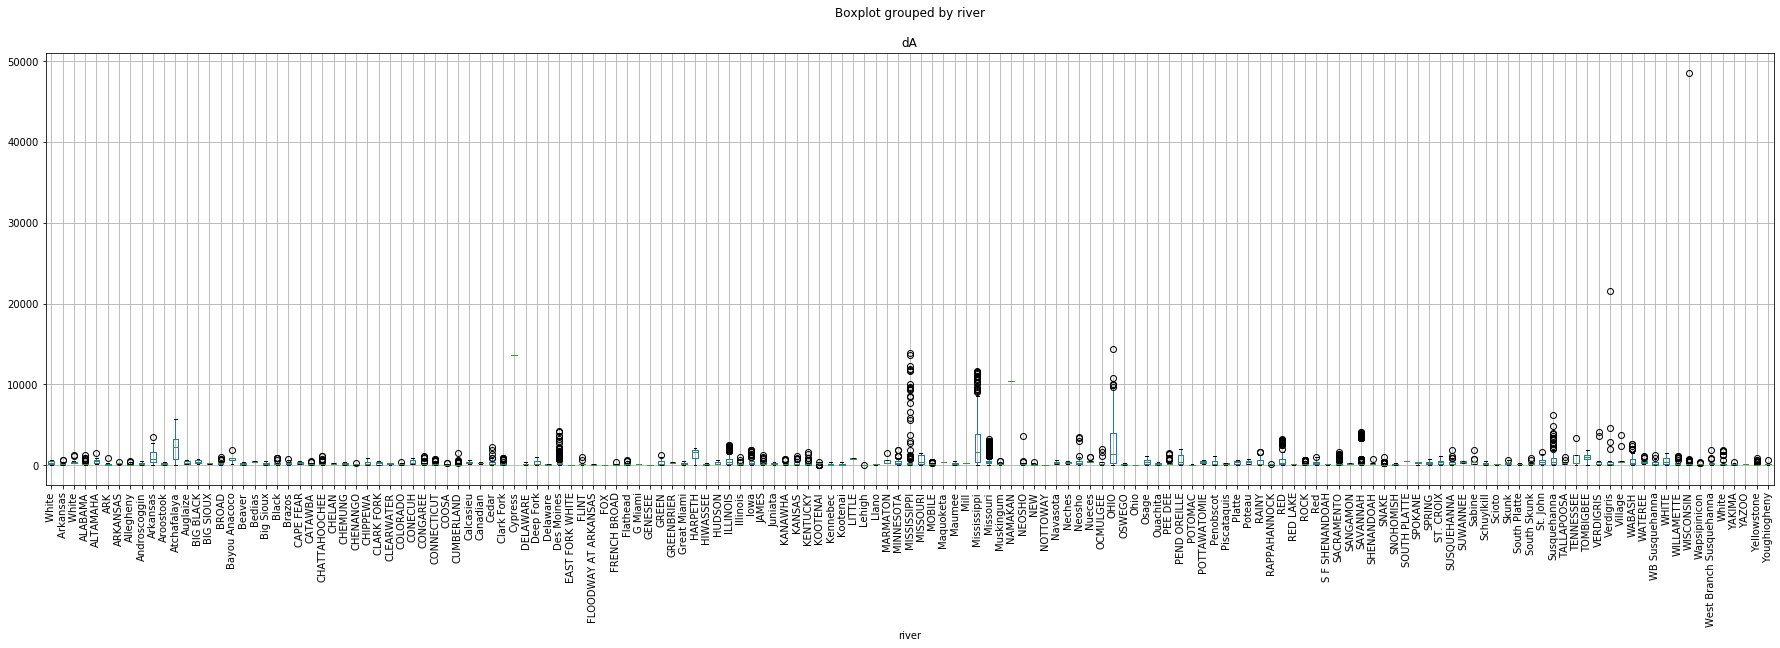

In [10]:
data_pepsi.boxplot("dA", "river", figsize=(30,8), rot=90);
data_hydro.boxplot("dA", "river", figsize=(30,8), rot=90);

### Corrélations

In [11]:
# Pour Pepsi
dataP = data_pepsi.drop(columns=['river', 'day','reach','U']) #remove site_no & station_name & U
corr = dataP.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,alpha,beta,Fr,Q
lon,1.000000,-0.211614,-0.148053,0.382034,0.262566,-0.629972,0.350079,0.311795,0.009389,0.293228,0.395090,0.244695,0.357230,0.357635,-0.117333,0.126622,0.288866
lat,-0.211614,1.000000,-0.386795,0.297858,-0.392643,-0.007181,-0.509089,-0.582771,0.143544,-0.423700,-0.522372,-0.616693,-0.671259,-0.519181,0.172397,0.035295,-0.515565
flowacc,-0.148053,-0.386795,1.000000,-0.203561,0.314526,0.444914,0.329600,0.409006,-0.117351,0.290605,0.239488,0.440935,0.472079,0.310078,-0.259154,0.189468,0.401895
sinuosity,0.382034,0.297858,-0.203561,1.000000,-0.001933,-0.374929,-0.090735,-0.140904,0.034973,-0.051616,0.045630,-0.214347,-0.162690,0.133270,-0.129910,0.270813,-0.094383
meandwave,0.262566,-0.392643,0.314526,-0.001933,1.000000,-0.079633,0.328790,0.301343,-0.016412,0.328549,0.225143,0.183122,0.349859,0.166288,-0.042724,0.315774,0.378971
height,-0.629972,-0.007181,0.444914,-0.374929,-0.079633,1.000000,-0.182646,-0.177196,-0.025970,-0.154377,-0.133176,-0.153939,-0.207865,0.019657,-0.321207,0.149696,-0.157335
W,0.350079,-0.509089,0.329600,-0.090735,0.328790,-0.182646,1.000000,0.926709,-0.077262,0.900713,0.474360,0.690656,0.750138,0.339153,-0.077852,0.096948,0.903374
A,0.311795,-0.582771,0.409006,-0.140904,0.301343,-0.177196,0.926709,1.000000,-0.143375,0.901172,0.549451,0.834676,0.867810,0.396667,-0.074280,-0.015962,0.940433
S,0.009389,0.143544,-0.117351,0.034973,-0.016412,-0.025970,-0.077262,-0.143375,1.000000,-0.065743,-0.401191,-0.199466,-0.169225,-0.303994,0.078304,0.544273,-0.103195
dA,0.293228,-0.423700,0.290605,-0.051616,0.328549,-0.154377,0.900713,0.901172,-0.065743,1.000000,0.355923,0.513549,0.595725,0.273917,-0.072796,0.137252,0.927921


In [23]:
# Pour Hydro
dataH = data_hydro.drop(columns=['site_no', 'river','station_name','stream_type' ,'U']) #remove site_no & station_name & U
corr = dataP.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,alpha,beta,Fr,Q
lon,1.000000,-0.211614,-0.148053,0.382034,0.262566,-0.629972,0.350079,0.311795,0.009389,0.293228,0.395090,0.244695,0.357230,0.357635,-0.117333,0.126622,0.288866
lat,-0.211614,1.000000,-0.386795,0.297858,-0.392643,-0.007181,-0.509089,-0.582771,0.143544,-0.423700,-0.522372,-0.616693,-0.671259,-0.519181,0.172397,0.035295,-0.515565
flowacc,-0.148053,-0.386795,1.000000,-0.203561,0.314526,0.444914,0.329600,0.409006,-0.117351,0.290605,0.239488,0.440935,0.472079,0.310078,-0.259154,0.189468,0.401895
sinuosity,0.382034,0.297858,-0.203561,1.000000,-0.001933,-0.374929,-0.090735,-0.140904,0.034973,-0.051616,0.045630,-0.214347,-0.162690,0.133270,-0.129910,0.270813,-0.094383
meandwave,0.262566,-0.392643,0.314526,-0.001933,1.000000,-0.079633,0.328790,0.301343,-0.016412,0.328549,0.225143,0.183122,0.349859,0.166288,-0.042724,0.315774,0.378971
height,-0.629972,-0.007181,0.444914,-0.374929,-0.079633,1.000000,-0.182646,-0.177196,-0.025970,-0.154377,-0.133176,-0.153939,-0.207865,0.019657,-0.321207,0.149696,-0.157335
W,0.350079,-0.509089,0.329600,-0.090735,0.328790,-0.182646,1.000000,0.926709,-0.077262,0.900713,0.474360,0.690656,0.750138,0.339153,-0.077852,0.096948,0.903374
A,0.311795,-0.582771,0.409006,-0.140904,0.301343,-0.177196,0.926709,1.000000,-0.143375,0.901172,0.549451,0.834676,0.867810,0.396667,-0.074280,-0.015962,0.940433
S,0.009389,0.143544,-0.117351,0.034973,-0.016412,-0.025970,-0.077262,-0.143375,1.000000,-0.065743,-0.401191,-0.199466,-0.169225,-0.303994,0.078304,0.544273,-0.103195
dA,0.293228,-0.423700,0.290605,-0.051616,0.328549,-0.154377,0.900713,0.901172,-0.065743,1.000000,0.355923,0.513549,0.595725,0.273917,-0.072796,0.137252,0.927921


## Analyse en composantes principales

In [13]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
pca_hydro = PCA()
pca_pepsi = PCA()

In [14]:
# On retire les variables qualitatives + Q
data_pepsi_ACP = data_pepsi.drop(['river','day','reach','Q'],axis=1)
data_hydro_ACP = data_hydro.drop(['site_no','station_name','river','stream_type','Q'],axis=1)

In [15]:
pepsiR = pd.DataFrame(scale(data_pepsi_ACP), columns = data_pepsi_ACP.columns)
hydroR = pd.DataFrame(scale(data_hydro_ACP), columns = data_hydro_ACP.columns)

C_pepsi = pca_pepsi.fit(pepsiR).transform(pepsiR)
C_hydro = pca_hydro.fit(hydroR).transform(hydroR)

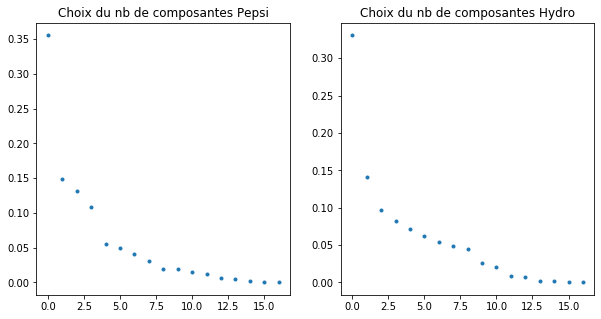

In [16]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].plot(pca_pepsi.explained_variance_ratio_,'.')
axs[0].set_title("Choix du nb de composantes Pepsi")

axs[1].plot(pca_hydro.explained_variance_ratio_,'.')
axs[1].set_title("Choix du nb de composantes Hydro")

plt.show()

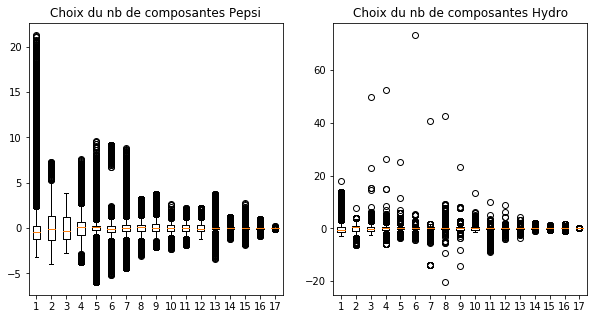

In [17]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].boxplot(C_pepsi)
axs[0].set_title("Choix du nb de composantes Pepsi")

axs[1].boxplot(C_hydro)
axs[1].set_title("Choix du nb de composantes Hydro")

plt.show()

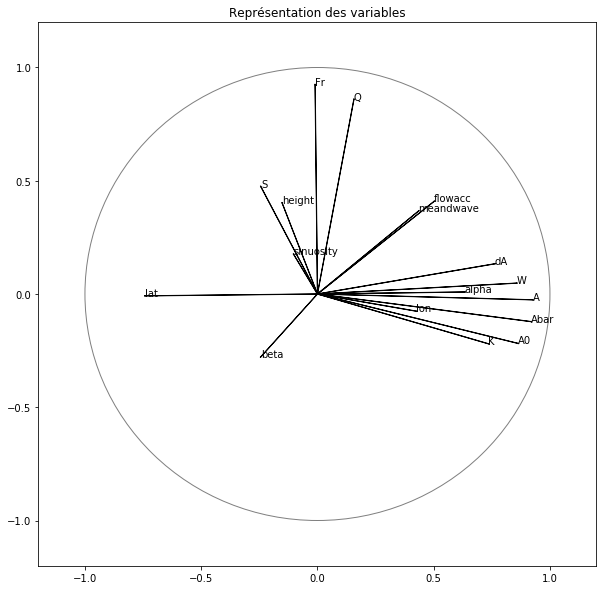

In [18]:
## coordonnées et représentation des variables
coord1=pca_pepsi.components_[0]*np.sqrt(pca_pepsi.explained_variance_[0])
coord2=pca_pepsi.components_[1]*np.sqrt(pca_pepsi.explained_variance_[1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dataP.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.title("Représentation des variables")
plt.show()

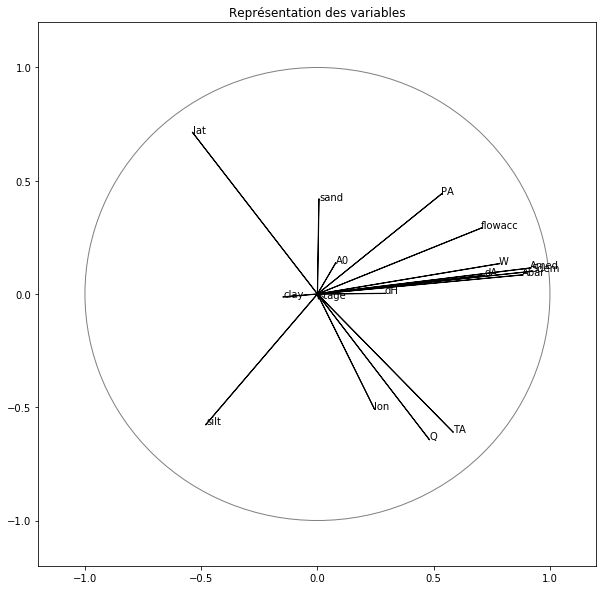

In [24]:
## coordonnées et représentation des variables
coord1=pca_hydro.components_[0]*np.sqrt(pca_hydro.explained_variance_[0])
coord2=pca_hydro.components_[1]*np.sqrt(pca_hydro.explained_variance_[1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dataH.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
plt.title("Représentation des variables")
ax.add_patch(c)
plt.show()

# <FONT COLOR="Red">Partie 2 : Classification</font> 